Importacion de librerias y carga del dataset

In [15]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import plot_tree

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)

Carga y exploracion inicial

In [16]:
heart = fetch_ucirepo(id=45)

X = heart.data.features.copy()
y = heart.data.targets['num']

print("Shape del dataset:", X.shape)
display(X.head())
display(X.info())
display(X.describe())


Shape del dataset: (303, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


Preprocesamiento de datos

In [17]:
X = X.dropna()
y = y.loc[X.index]

categorical_cols = ['cp', 'restecg', 'slope', 'thal', 'ca']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

Division 70/30

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

print("Tamaño Train:", X_train.shape)
print("Tamaño Test:", X_test.shape)

Tamaño Train: (207, 13)
Tamaño Test: (90, 13)


Analisis Exploratorio (EDA)

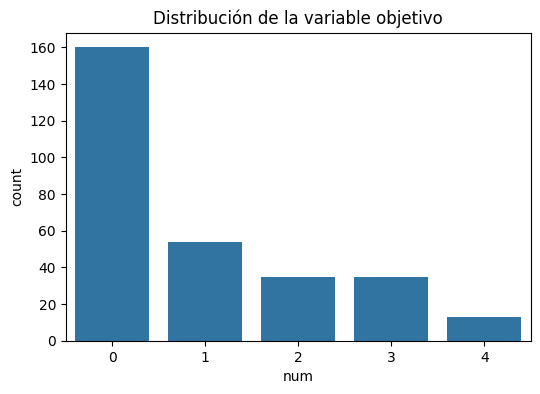

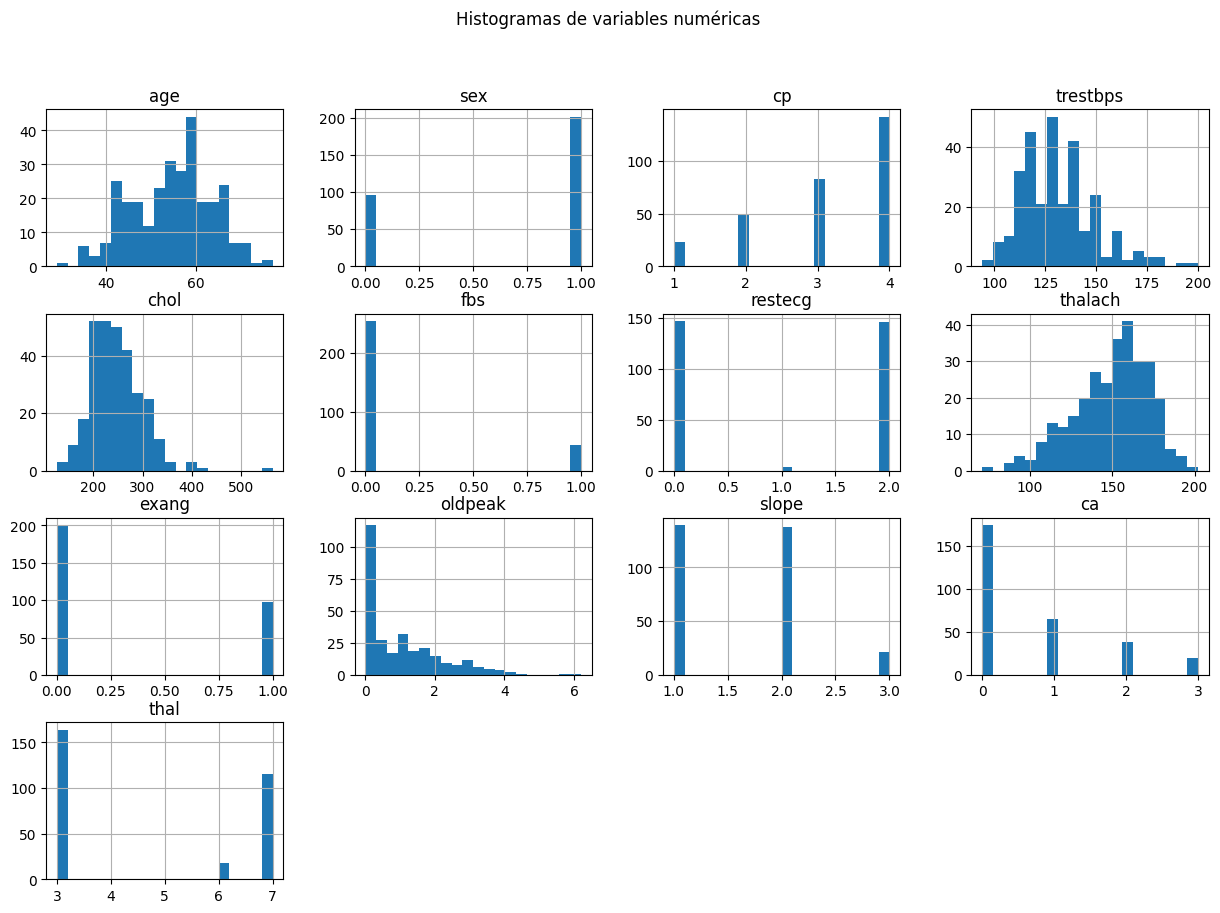

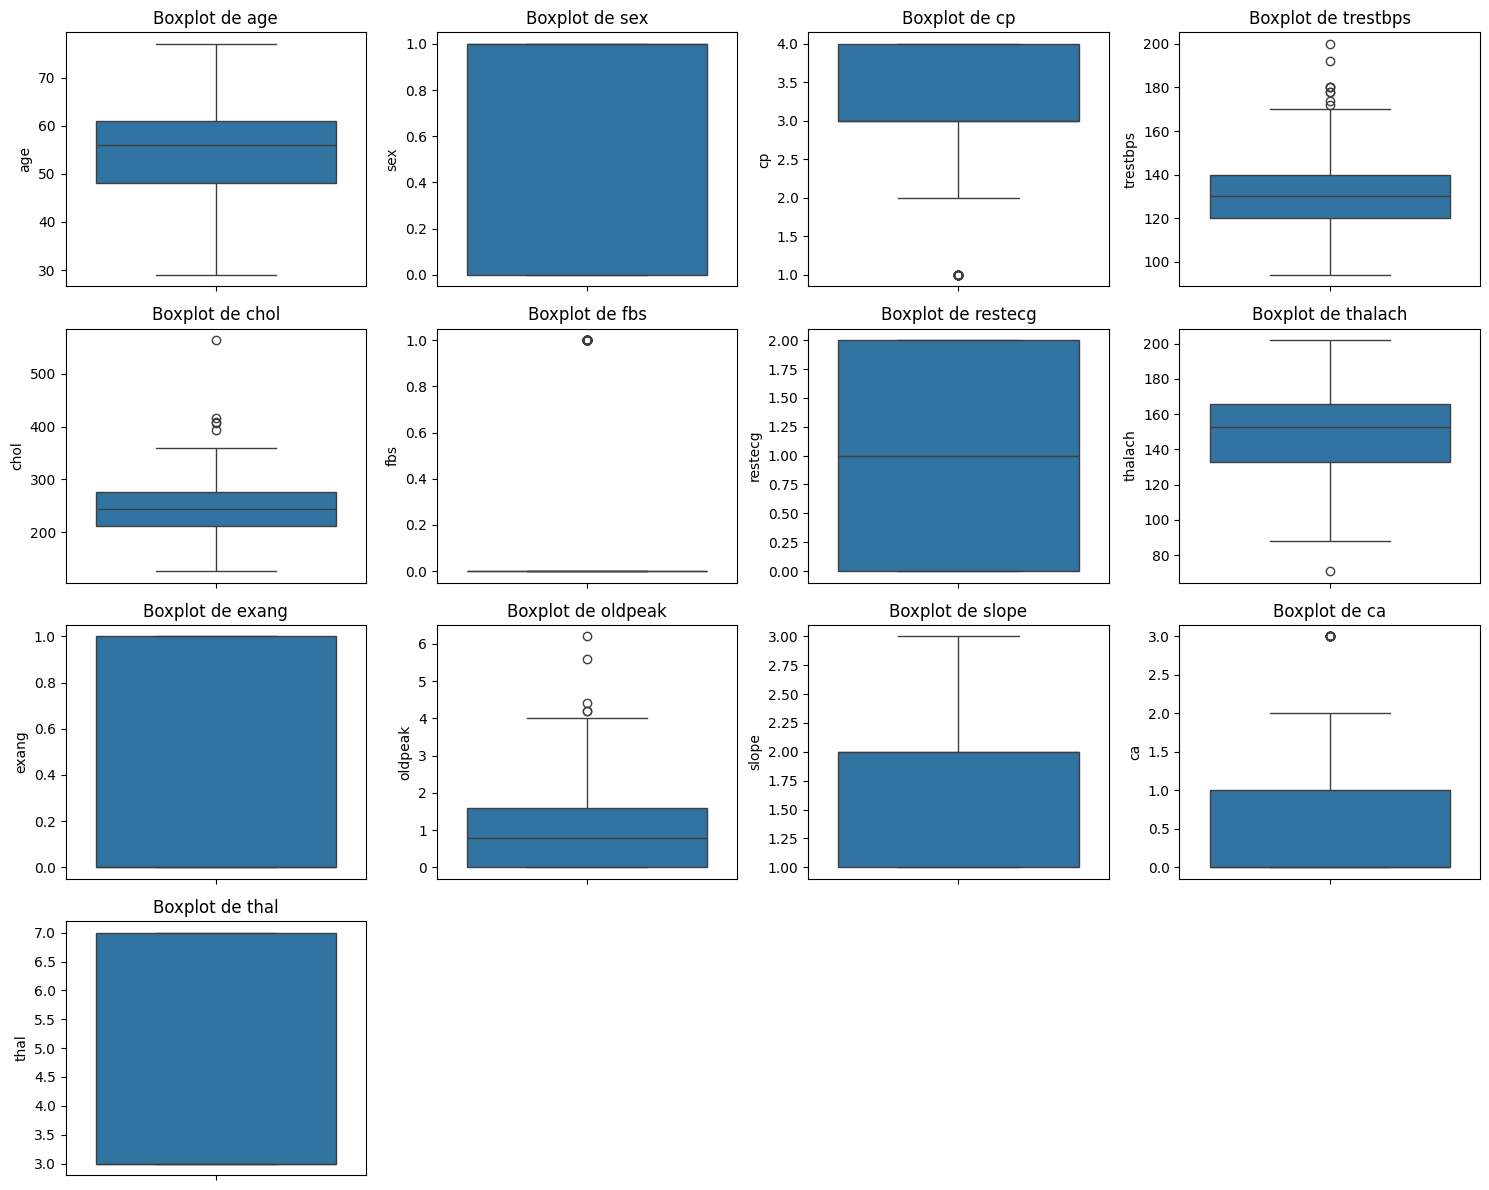

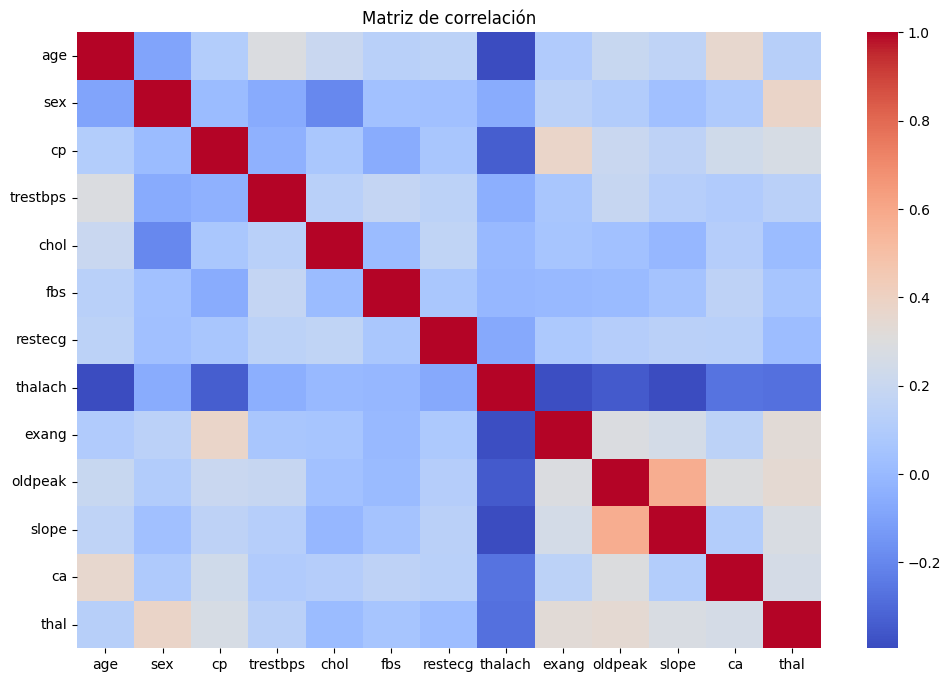

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Distribución de la variable objetivo")
plt.show()

X.hist(bins=20, figsize=(15,10))
plt.suptitle("Histogramas de variables numéricas")
plt.show()

# BOXPLOTS
plt.figure(figsize=(15, 12))
for i, column in enumerate(X.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=X[column])
    plt.title(f"Boxplot de {column}")
plt.tight_layout()
plt.show()

# Correlación
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), annot=False, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


Entrenamientos de Modelos

In [20]:
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "SVM (RBF)": SVC(kernel="rbf")
}

resultados = []

for nombre, modelo in modelos.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', modelo)
    ])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision": precision_score(y_test, pred, average='weighted'),
        "Recall": recall_score(y_test, pred, average='weighted'),
        "F1-score": f1_score(y_test, pred, average='weighted')
    })

df_resultados = pd.DataFrame(resultados)
display(df_resultados)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

,Modelo,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.600000,0.529153,0.600000,0.557265
1,Decision Tree,0.455556,0.441179,0.455556,0.447781
2,Random Forest,0.544444,0.452238,0.544444,0.489467
3,SVM (RBF),0.577778,0.463889,0.577778,0.509890


Optimizacion de Random Forest

In [21]:
param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 5, 10],
    "model__min_samples_split": [2, 5]
}

pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])

grid = GridSearchCV(pipe_rf, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)

best_rf = grid.best_estimator_
pred_opt = best_rf.predict(X_test)

df_resultados.loc[len(df_resultados)] = [
    "Random Forest OPT",
    accuracy_score(y_test, pred_opt),
    precision_score(y_test, pred_opt, average='weighted'),
    recall_score(y_test, pred_opt, average='weighted'),
    f1_score(y_test, pred_opt, average='weighted')
]

display(df_resultados)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categ

Mejores parámetros: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 300}


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Modelo,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.600000,0.529153,0.600000,0.557265
1,Decision Tree,0.455556,0.441179,0.455556,0.447781
2,Random Forest,0.544444,0.452238,0.544444,0.489467
3,SVM (RBF),0.577778,0.463889,0.577778,0.509890
4,Random Forest OPT,0.555556,0.464440,0.555556,0.500958


Grafica Comparativa Final

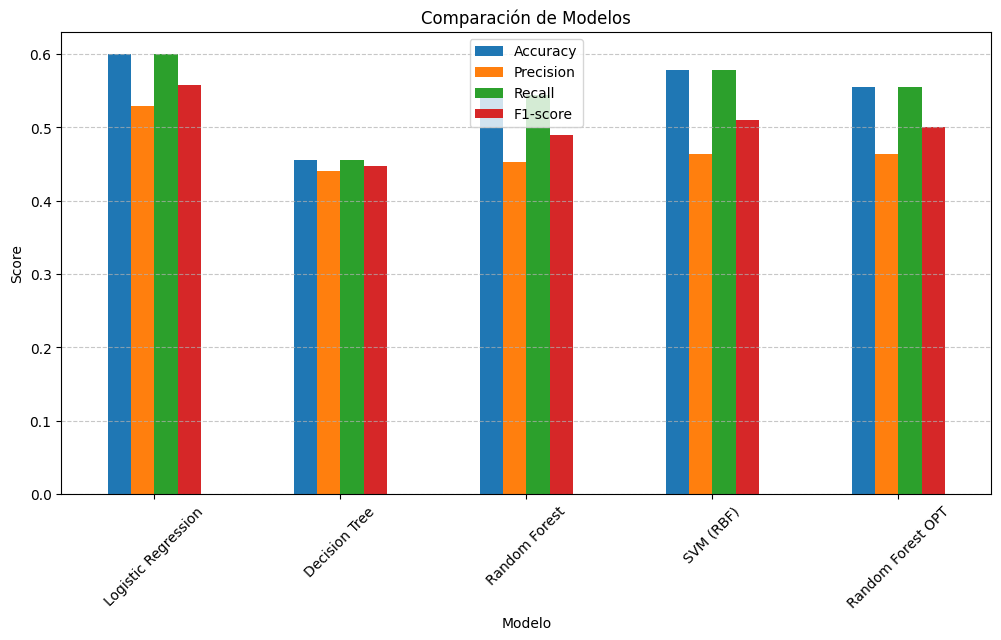

In [22]:
df_resultados.set_index("Modelo").plot(kind="bar", figsize=(12,6))
plt.title("Comparación de Modelos")
plt.ylabel("Score")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Importancia de Variables

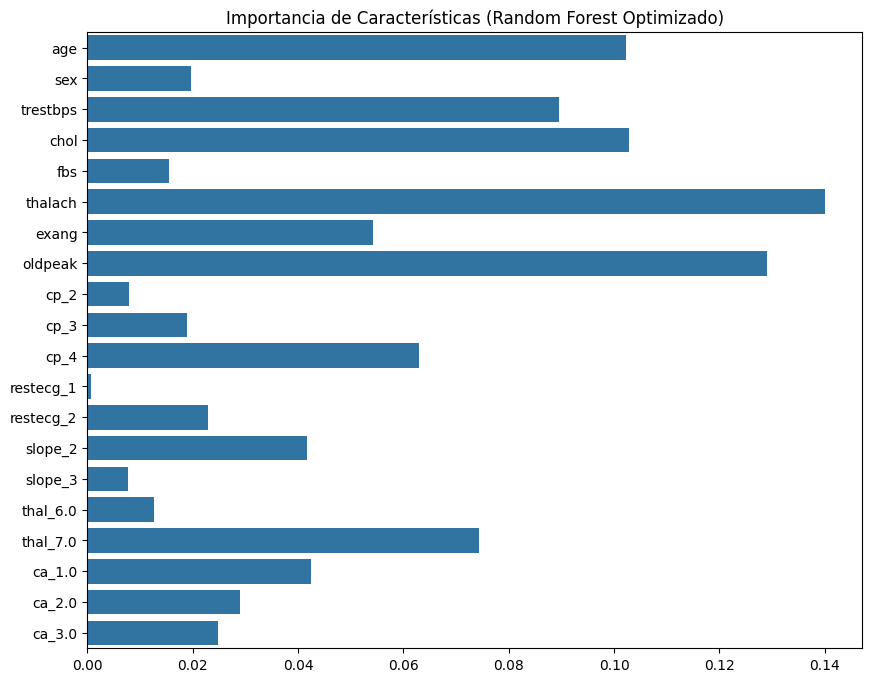

In [23]:
ohe = best_rf.named_steps['preprocessor'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(categorical_cols)

all_features = numeric_cols + list(ohe_features)
importances = best_rf.named_steps['model'].feature_importances_

plt.figure(figsize=(10,8))
sns.barplot(x=importances, y=all_features)
plt.title("Importancia de Características (Random Forest Optimizado)")
plt.show()

Representacion del arbol de decision

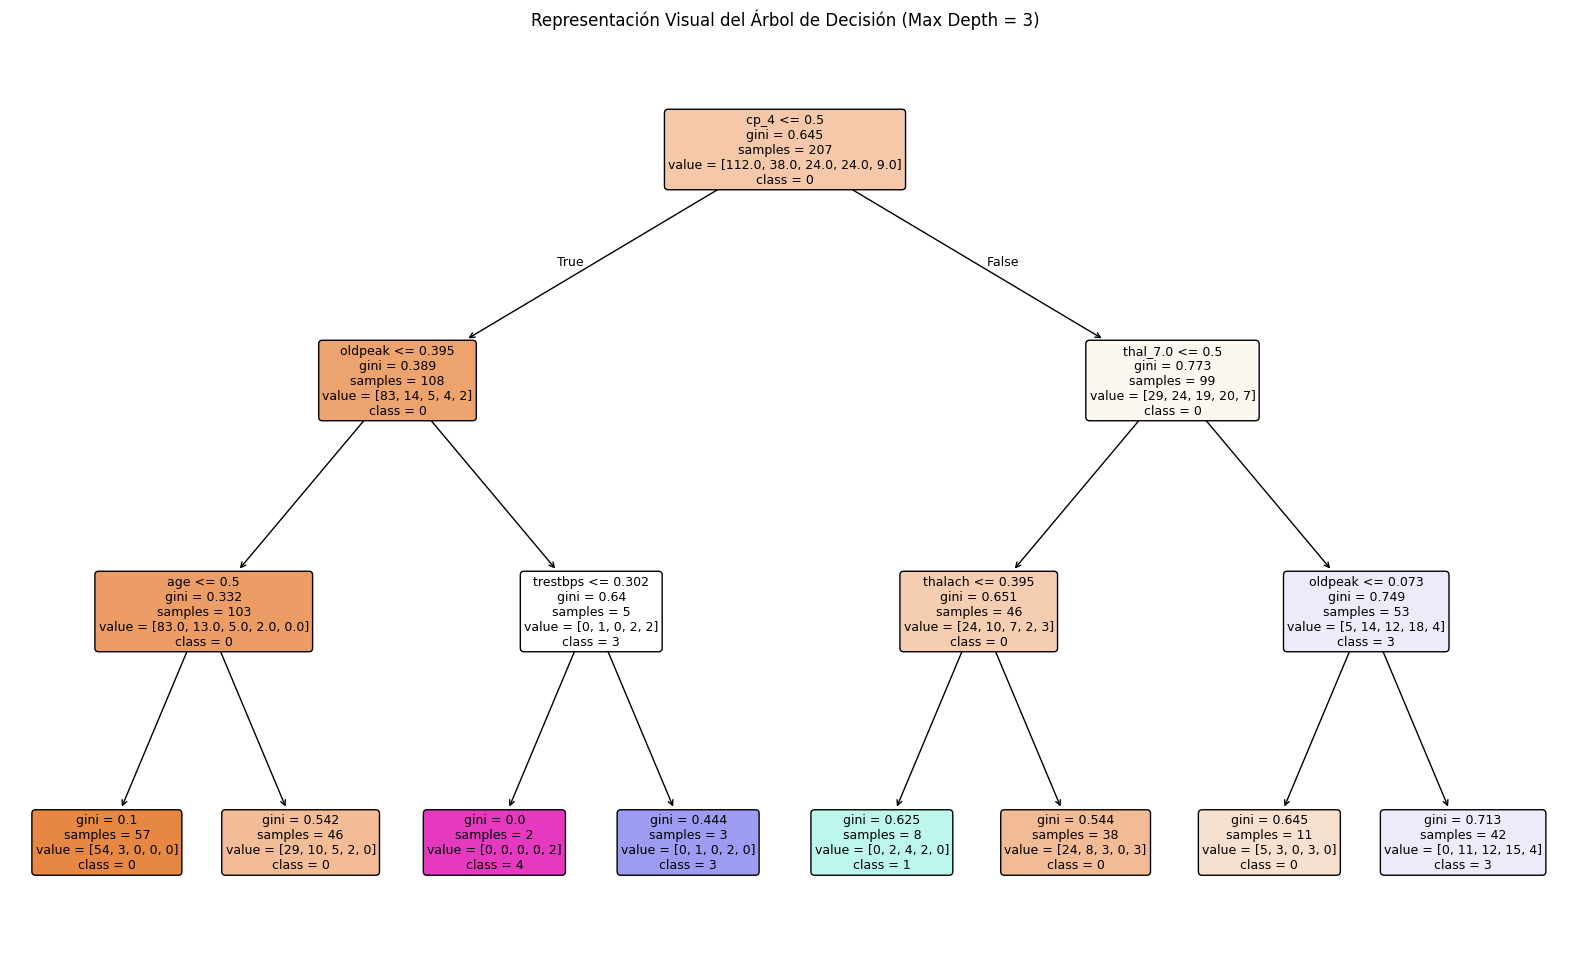

In [24]:
from sklearn.tree import plot_tree

# Extraer el modelo de árbol dentro del pipeline entrenado
arbol = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(max_depth=3)) # Limitar la profundidad máxima a 3
])
arbol.fit(X_train, y_train)

modelo_arbol = arbol.named_steps["model"]

# Obtener nombres de columnas del OneHotEncoder para poder visualizar las ramas
ohe = arbol.named_steps["preprocessor"].named_transformers_['cat']
encoded_cols = ohe.get_feature_names_out(categorical_cols)

# Unir columnas numéricas con las codificadas
feature_names = np.concatenate([numeric_cols, encoded_cols])

# Graficar el árbol
plt.figure(figsize=(20, 12))
plot_tree(
    modelo_arbol,
    feature_names=feature_names,
    class_names=[str(c) for c in y.unique()],
    filled=True,
    rounded=True,
    fontsize=9
)

plt.title("Representación Visual del Árbol de Decisión (Max Depth = 3)")
plt.show()